In [67]:
import shutil
import os

ROOT_DIR = '/content/Blood_cell'

if os.path.exists(ROOT_DIR):
    shutil.rmtree(ROOT_DIR)
    print(ROOT_DIR, 'is removed !')

/content/Blood_cell is removed !


In [68]:
import zipfile
import os

DATA_ROOT_PATH = '/content/drive/MyDrive/Git/ICT_Visual/Data'

with zipfile.ZipFile(os.path.join(DATA_ROOT_PATH,'Blood_cell.zip')) as target_file:

    target_file.extractall('Blood_cell')

In [69]:
TRAIN_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'TRAIN')
TEST_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'TEST')
TEST_SIMPLE_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'TEST_SIMPLE')

# 전체 데이터 개수 확인

In [70]:
# TRAIN 
train_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
for label_name in train_label_list:

    print(f'train {label_name} => {len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

# TEST
test_label_list = os.listdir(TEST_DATA_ROOT_DIR)
for label_name in test_label_list:

    print(f'test {label_name} => {len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name)))}')
print('=============================================')

# TEST SIMPLE
test_simple_label_list = os.listdir(TEST_SIMPLE_DATA_ROOT_DIR)
for label_name in test_simple_label_list:

    print(f'test simple {label_name} => {len(os.listdir(os.path.join(TEST_SIMPLE_DATA_ROOT_DIR, label_name)))}')

print('=============================================')

train EOSINOPHIL => 2497
train LYMPHOCYTE => 2483
train MONOCYTE => 2478
train NEUTROPHIL => 2499
test EOSINOPHIL => 623
test LYMPHOCYTE => 620
test MONOCYTE => 620
test NEUTROPHIL => 624
test simple EOSINOPHIL => 13
test simple LYMPHOCYTE => 6
test simple MONOCYTE => 4
test simple NEUTROPHIL => 48


# 이미지 사이즈 통계


In [71]:
import numpy as np
import glob
import cv2

# TRAIN 
train_label_list = os.listdir(TRAIN_DATA_ROOT_DIR)
for label_name in train_label_list:

    label_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
    
    img_file_list = glob.glob(label_path + '/*.jpeg')
    width_list = []
    height_list = []

    for file_name in img_file_list:
        try:

            src_img = cv2.imread(file_name, cv2.IMREAD_COLOR)
            width_list.append(src_img.shape[0])
            height_list.append(src_img.shape[1])
        except Exception as err:
            print(str(err), file_name)
    width_np = np.array(width_list)
    height_np = np.array(width_list)
    print('==========================================================================================')
    print(label_name, 'avg width :', np.average(width_np), 'average height :', np.average(height_np)) 
    print(label_name, 'std width :', np.std(width_np), 'average height :', np.std(height_np)) 
    print(label_name, 'max width :', np.max(width_np), 'average height :', np.max(height_np)) 
    print(label_name, 'min width :', np.min(width_np), 'average height :', np.min(height_np)) 
    print('==========================================================================================')

EOSINOPHIL avg width : 240.0 average height : 240.0
EOSINOPHIL std width : 0.0 average height : 0.0
EOSINOPHIL max width : 240 average height : 240
EOSINOPHIL min width : 240 average height : 240
LYMPHOCYTE avg width : 240.0 average height : 240.0
LYMPHOCYTE std width : 0.0 average height : 0.0
LYMPHOCYTE max width : 240 average height : 240
LYMPHOCYTE min width : 240 average height : 240
MONOCYTE avg width : 240.0 average height : 240.0
MONOCYTE std width : 0.0 average height : 0.0
MONOCYTE max width : 240 average height : 240
MONOCYTE min width : 240 average height : 240
NEUTROPHIL avg width : 240.0 average height : 240.0
NEUTROPHIL std width : 0.0 average height : 0.0
NEUTROPHIL max width : 240 average height : 240
NEUTROPHIL min width : 240 average height : 240


# Test에 Test simple 결합

In [72]:
label_list = os.listdir(TEST_DATA_ROOT_DIR)
print(label_list)
for label_name in label_list:

    test_simple_path = os.path.join(TEST_SIMPLE_DATA_ROOT_DIR,label_name) 
    test_path = os.path.join(TEST_DATA_ROOT_DIR,label_name)
    file_name_list = os.listdir(test_simple_path)
    
    move_nums = 0

    for file_name in file_name_list:
        try:
            shutil.move(os.path.join(test_simple_path,file_name),
                        os.path.join(test_path,file_name))
            move_nums+=1
        except Exception as err:
            print(str(err))
    print(move_nums, 'is moved into ',label_name, '(TEST_SIMPLE -> TEST) ')        

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
13 is moved into  EOSINOPHIL (TEST_SIMPLE -> TEST) 
6 is moved into  LYMPHOCYTE (TEST_SIMPLE -> TEST) 
4 is moved into  MONOCYTE (TEST_SIMPLE -> TEST) 
48 is moved into  NEUTROPHIL (TEST_SIMPLE -> TEST) 


# 이미지 사이즈 정의

In [73]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

# ImageDataGenerator 정의

In [74]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
test_simple_gen = ImageDataGenerator(rescale=1./255)


In [75]:
train_data = train_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                           batch_size=16, color_mode='rgb',
                                           class_mode='sparse',
                                           target_size=(IMG_WIDTH, IMG_HEIGHT))
test_data = train_gen.flow_from_directory(directory=TEST_DATA_ROOT_DIR,
                                          batch_size=16, color_mode='rgb',
                                          class_mode='sparse',
                                          target_size=(IMG_WIDTH, IMG_HEIGHT))                                                                                      
test_simple_data = train_gen.flow_from_directory(directory=TEST_SIMPLE_DATA_ROOT_DIR,
                                                 batch_size=16, color_mode='rgb',
                                                 class_mode='sparse',
                                                 target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 9957 images belonging to 4 classes.
Found 2558 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [76]:
print(train_data.class_indices)
print(train_data.num_classes)

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
4


# 모델링

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet

In [78]:
pre_trained_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))


In [79]:
class_nums = train_data.num_classes
model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_nums,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_4   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 128)               131200    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)               

In [80]:
model.compile(optimizer=Adam(2e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [81]:
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_acc',
                          patience=5,
                          verbose=1)

start_time = datetime.now()

hist = model.fit(train_data,
                 epochs=30,
                 validation_data=test_data)

end_time = datetime.now()

print('\n\nElapsed time => ', end_time - start_time)


Epoch 1/30
623/623 [==============================] - 114s 177ms/step - loss: 0.9034 - acc: 0.5833 - val_loss: 2.7213 - val_acc: 0.4464
Epoch 2/30
623/623 [==============================] - 110s 176ms/step - loss: 0.5217 - acc: 0.7134 - val_loss: 2.1149 - val_acc: 0.5958
Epoch 3/30
623/623 [==============================] - 109s 175ms/step - loss: 0.5475 - acc: 0.6966 - val_loss: 1.0125 - val_acc: 0.4851
Epoch 4/30
623/623 [==============================] - 109s 175ms/step - loss: 0.4610 - acc: 0.7268 - val_loss: 0.7172 - val_acc: 0.6329
Epoch 5/30
623/623 [==============================] - 109s 175ms/step - loss: 0.4450 - acc: 0.7328 - val_loss: 1.7994 - val_acc: 0.4457
Epoch 6/30
623/623 [==============================] - 109s 175ms/step - loss: 0.4067 - acc: 0.7831 - val_loss: 0.6267 - val_acc: 0.8581
Epoch 7/30
623/623 [==============================] - 109s 175ms/step - loss: 0.4676 - acc: 0.8191 - val_loss: 0.8188 - val_acc: 0.6317
Epoch 8/30
623/623 [============================

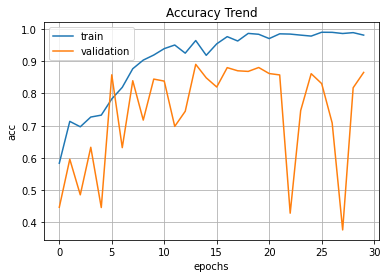

In [82]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid()
plt.legend()
plt.show()

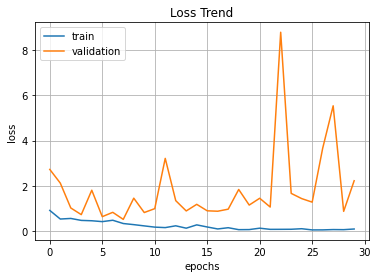

In [83]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

In [84]:
model.evaluate(test_data)

160/160 [==============================] - 8s 52ms/step - loss: 2.2189 - acc: 0.8655


[2.2188971042633057, 0.8655199408531189]